#  Assignment Week 7-8 Term Project Milestone-3 Cleaning/Formatting  Website Data


''' 
 
Name : Karthikeyan Chellamuthu

Date : 05-08-2022

'''


In [2]:
# Importing necessary libraries for both step1 & Step2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import codecs
import os
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
'''In milestone 3 we will be cleaning and formatting the website data, using two differnt steps.  As part of step :1  we would like to do further analyze of the digital currency for further investments. 
previously we did analyzed the historical trend of the given data for various digital currency and see the price fluctuation is high compared to the trading price of stocks. 
We have applied all the transformation on csv files (data) and created a final dataset with can be used to make a join with other type of datasets.

In this week we will be clean/transform website data that we considered form this website link https://en.wikipedia.org/wiki/List_of_cryptocurrencies. We will consider the details about various cryptocurrencies available in the below website page (wikipedia). The details available in the below page contains metadata about various cryptocurrencies.

'''

'In milestone 3 we will be cleaning and formatting the website data as part of step :1  we would like to do further analyze of the digital currency for further investments. \npreviously we did analyzed the historical trend of the given data for various digital currency and see the price fluctuation is high compared to the trading price of stocks. \nWe have applied all the transformation on csv files (data) and created a final dataset with can be used to make a join with other type of datasets.\n\nIn this week we will be clean/transform website data that we considered form this website link https://en.wikipedia.org/wiki/List_of_cryptocurrencies. We will consider the details about various cryptocurrencies available in the below website page (wikipedia). The details available in the below page contains metadata about various cryptocurrencies.\n\n'

In [5]:
# Step 1:

# Reading website data using beautifulSoup library available in Python

fd = codecs.open("List of cryptocurrencies - Wikipedia.html","r",'utf-8')
soup = BeautifulSoup(fd)
fd.close()

In [6]:
# Find the metadata  structure you will need to deal with including the total number of objects

all_tables = soup.find_all("table")
print("Total number of Objects: {} ".format(len(all_tables)))

Total number of Objects: 14 


In [7]:
# Create a for loop to perform the  table list and display the tables names. this is to get the content form the webpage


i = 1               # i is declared to 1 for printing the table result set
for table in all_tables:
     if table.findParent("table") is None:
        print("\nTable {} present in the webpage considered for analysis\n".format(i))
        print(str(table))
        i = i+1


Table 1 present in the webpage considered for analysis

<table class="wikitable sortable jquery-tablesorter" style="text-align: left; width: auto;">
<thead><tr>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Release
</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Currency
</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Symbol
</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Founder(s)
</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending"><a href="https://en.wikipedia.org/wiki/Hash_function" title="Hash function">Hash algorithm</a>
</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Programming language of implementation
</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Consensus mechanism
</th>
<th c

In [8]:
''' Computing the length for each table and then to print the content of each table.  As per the previous output,
we could see last three tables are not required for our analysis as it contains different data for the initial and final table, we could see "Release Year" is not present as "tr" tag. Instead it is present as "th" tag
Hence we have to format the data accordinly to remove  the "Release" field from 1st and last table from the dataset. Here with i am 
Creating a list of dataframes for all the tables present in the webpage '''



' Computing the length for each table and then to print the content of each table.  As per the previous output,\nwe could see last three tables are not required for our analysis as it contains different data for the initial and final table, we could see "Release Year" is not present as "tr" tag. Instead it is present as "th" tag\nHence we have to format the data accordinly to remove  the "Release" field from 1st and last table from the dataset. Here with i am \nCreating a list of dataframes for all the tables present in the webpage '

In [9]:
# initiate the first table for a given for loop
i = 1

# Declaring a list to store all the df
df_list = []

# create for loop to get the tables present in the webpage

for ntable in range(len(all_tables)-3):
    data_table = soup.findAll("table")[ntable]
    print('\nLength of data_table {} is: {}\n'.format(i, len(data_table)))
    i = i+1
    
    header = [th.getText().strip() for th in data_table.findAll('thead')[0].findAll('th')]
    if "Release" in header:
         header.remove('Release')
    if 'Cryptocurrency blockchain (PoS, PoW, or other)' in header:
        header = ['Consensus mechanism' if x == 'Cryptocurrency blockchain (PoS, PoW, or other)' else x for x in header]
    print('Columns/Headers present in the table {}: {}'.format(i, header))
    
    data = data_table.findAll('tr')
    data_rows = [[td.get_text().strip() for td in tr.findAll('td')] for tr in data]
    print('Data part within First GDP tables are : {}'.format(data_rows))
    
# Include the addtional dataframe for the header and rows extracted from the dataset. 

# Add the dataframe to the lists

    df = pd.DataFrame(data_rows, columns=header)
    df.head(3)
    df_list.append(df)
    
# Also dropped the unwanted tables


Length of data_table 1 is: 4

Columns/Headers present in the table 2: ['Currency', 'Symbol', 'Founder(s)', 'Hash algorithm', 'Programming language of implementation', 'Consensus mechanism', 'Notes']
Data part within First GDP tables are : [[], ['Bitcoin', 'BTC,[2] XBT, ₿', 'Satoshi Nakamoto[nt 1]', 'SHA-256d[3][4]', 'C++[5]', 'PoW[4][6]', 'The first and most widely used decentralized ledger currency,[7] with the highest market capitalization.[8]'], ['Litecoin', 'LTC, Ł', 'Charlie Lee', 'Scrypt', 'C++[9]', 'PoW', 'One of the first cryptocurrencies to use scrypt as a hashing algorithm.'], ['Namecoin', 'NMC', 'Vincent Durham[10][11]', 'SHA-256d', 'C++[12]', 'PoW', 'Also acts as an alternative, decentralized DNS.'], ['Peercoin', 'PPC', 'Sunny King(pseudonym)[citation needed]', 'SHA-256d[citation needed]', 'C++[13]', 'PoW & PoS', 'The first cryptocurrency to use both PoW and PoS functions.']]

Length of data_table 2 is: 4

Columns/Headers present in the table 3: ['Currency', 'Symbol', 'Fou

In [10]:
# Concatenating all the dataframes present in the list

crypto_raw_df = pd.concat(df_list, ignore_index=True)
# Display the header records using head command

crypto_raw_df.head()

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes
0,None,None,None,None,None,None,None
1,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...
2,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...
3,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS."
4,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...


In [11]:
# Compute the necessary count and metadata for earch attributes available in the dataframe 

r, c = crypto_raw_df.shape
print("Count of total number of rows present in the dataframe: {}".format(r))
print("Count of total number of columns present in the dataframe: {}".format(c))

Count of total number of rows present in the dataframe: 51
Count of total number of columns present in the dataframe: 7


In [12]:
# Display the necessary metadata of given tables

crypto_raw_df.dtypes

Currency                                  object
Symbol                                    object
Founder(s)                                object
Hash algorithm                            object
Programming language of implementation    object
Consensus mechanism                       object
Notes                                     object
dtype: object

In [13]:
# show the header rows present in the computed dataframe

crypto_raw_df.head()

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes
0,None,None,None,None,None,None,None
1,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...
2,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...
3,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS."
4,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...


In [ ]:
'''In milestone 3 we will be cleaning and formatting the website data, using two differnt steps.  As part of step :2
Step 2: Perform data Cleansing such as cleaning the null rows from the dataset '''

# Step:2 Data cleansing 

In [14]:
# Compute the total number of null rows present in the dataset

print(" Total number of Null rows present in the dataset: {}".format(crypto_raw_df.Currency.isnull().sum()))

 Total number of Null rows present in the dataset: 11


In [15]:
# Data cleansing aka remove null suing dropna function for a given data set 

crypto_raw_df = crypto_raw_df.dropna()

In [16]:
# Just verify the results of the dataframe with few header rows 
crypto_raw_df.head()

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes
1,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...
2,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...
3,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS."
4,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...
6,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.


In [17]:
# We will now reset the index value after dropping null records

crypto_raw_df.reset_index(drop=True, inplace=True)

In [18]:
# Display the total count of rows and columns after removing null records

nrow, ncol = crypto_raw_df.shape
print("After cleansing Total number of rows present in the dataframe : {}".format(nrow))
print("After cleansing Total number of columns present in the dataframe: {}".format(ncol))

After cleansing Total number of rows present in the dataframe : 40
After cleansing Total number of columns present in the dataframe: 7


In [19]:
# display the entire df to perfrom further analysis

crypto_raw_df

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes
0,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...
2,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS."
3,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.
5,Gridcoin,GRC,Rob Hälford[17],Scrypt,C++[18],Decentralized PoS,Linked to citizen science through the Berkeley...
6,Primecoin,XPM,Sunny King(pseudonym)[citation needed],1CC/2CC/TWN[20],"TypeScript, C++[21]",PoW[20],Uses the finding of prime chains composed of C...
7,Ripple[22][23],XRP,Chris Larsen &Jed McCaleb[24],ECDSA[25],C++[26],"""Consensus""",Designed for peer to peer debt transfer. Not b...
8,Nxt,NXT,BCNext(pseudonym),SHA-256d[27],Java[28],PoS,Specifically designed as a flexible platform t...
9,Auroracoin,AUR,Baldur Odinsson(pseudonym)[29],Scrypt,C++[30],PoW,Created as an alternative currency for Iceland...


# Step:3 Handling nulls and missing values present in the dataset

In [20]:
'''After the further analysis we could see th symbol field present in the dataset is mandatory column which will be used to make futher joining with other datasets. 
There are some of the records in the dataset with missing value for symbol column. Hence, we have to populate some values for those records in order to make it as join field with other datasets.
The digital currency which are having null value for symbol are Ambacoin, Onecoin, kodakcoin and Petro. With the following symbols will be populated for these cryptocurrencies
Ambacoin: AMBA, OneCoin: One, KodakCoin: Kodak, Petro: Petro'''

'After the further analysis we could see th symbol field present in the dataset is mandatory column which will be used to make futher joining with other datasets. \nThere are some of the records in the dataset with missing value for symbol column. Hence, we have to populate some values for those records in order to make it as join field with other datasets.\nThe digital currency which are having null value for symbol are Ambacoin, Onecoin, kodakcoin and Petro. With the following symbols will be populated for these cryptocurrencies\nAmbacoin: AMBA, OneCoin: One, KodakCoin: Kodak, Petro: Petro'

In [21]:
# create a function to poupulate the digital currency symbols for the missing once

def populate_symbol(row):
    if 'Amba' in row['Currency']:
        return 'AMBA'
    elif 'OneCoin' in row['Currency']:
        return 'ONE'
    elif 'Kodak' in row['Currency']:
        return 'KODAK'
    elif 'Petro' in row['Currency']:
        return 'PETRO'
    else:
        return row['Symbol']

In [22]:
# Duplicate the raw dataframe into another dataframe to apply missing/null values

crypto_df = crypto_raw_df.copy()

In [23]:
# Add the newly created function to  populate_symbol for the missing once and display the digital currency

crypto_df['Symbol'] = crypto_df.apply(lambda row: populate_symbol(row), axis=1)

In [24]:
# Display few  sample values using head commands  after adding the  the missing values for Symbol
 
crypto_df.head(10)

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes
0,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...
2,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS."
3,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.
5,Gridcoin,GRC,Rob Hälford[17],Scrypt,C++[18],Decentralized PoS,Linked to citizen science through the Berkeley...
6,Primecoin,XPM,Sunny King(pseudonym)[citation needed],1CC/2CC/TWN[20],"TypeScript, C++[21]",PoW[20],Uses the finding of prime chains composed of C...
7,Ripple[22][23],XRP,Chris Larsen &Jed McCaleb[24],ECDSA[25],C++[26],"""Consensus""",Designed for peer to peer debt transfer. Not b...
8,Nxt,NXT,BCNext(pseudonym),SHA-256d[27],Java[28],PoS,Specifically designed as a flexible platform t...
9,Auroracoin,AUR,Baldur Odinsson(pseudonym)[29],Scrypt,C++[30],PoW,Created as an alternative currency for Iceland...


In [25]:
# Drop the digitalcurrencies for those has the Symbol values

crypto_df[(crypto_df.Symbol == 'PETRO') | (crypto_df.Symbol == 'AMBA') | (crypto_df.Symbol == 'ONE') | (crypto_df.Symbol == 'KODAK')]

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes
28,AmbaCoin,AMBA,,,,,official cryptocurrency of the Cameroonian sep...
36,OneCoin,ONE,Ruja Ignatova and Stephen Greenwood,,,,A Ponzi scheme promoted as a cryptocurrency.
38,KodakCoin,KODAK,Kodak and WENN Digital,Ethash[76],,,"KodakCoin is a ""photographer-centric"" blockcha..."
39,Petro,PETRO,Venezuelan Government,onixCoin[77],C++[78],,Stated by Nicolás Maduro to be backed by Venez...


# Step:4 Include new attributes to the dataset

In [26]:
'''We could see the  "release" has been provided as header for all the tables from the website itself. After evaluating the given information present in the website, we can create a function to populate release year field to the dataset'''

'We could see the  "release" has been provided as header for all the tables from the website itself. After evaluating the given information present in the website, we can create a function to populate release year field to the dataset'

In [27]:
# Create a function to populate the release year for all the digital currency  present in the dataframe

def release_year(row):
    if "BTC" in row['Symbol']:
        return 2009
    elif 'LTC' in row['Symbol'] or 'NMC' in row['Symbol']:
        return 2011
    elif 'PPC' in row['Symbol']:
        return 2012
    elif 'DOGE' in row['Symbol'] or 'GRC' in row['Symbol'] or 'XPM' in row['Symbol'] or 'XRP' in row['Symbol'] or 'NXT' in row['Symbol']:
        return 2013
    elif 'AUR' in row['Symbol'] or 'DASH' in row['Symbol'] or 'NEO' in row['Symbol'] or 'MZC' in row['Symbol'] or 'XMR' in row['Symbol'] or 'TIT' in row['Symbol'] or 'XVG' in row['Symbol'] or 'XLM' in row['Symbol'] or 'VTC' in row['Symbol'] or 'KOI' in row['Symbol']:
        return 2014
    elif 'ETH' in row['Symbol'] or 'ETC' in row['Symbol'] or 'Nano' in row['Symbol'] or 'USDT' in row['Symbol'] or 'ONE' in row['Symbol']:
        return 2015
    elif 'FIRO' in row['Symbol'] or 'ZEC' in row['Symbol']:
        return 2016
    elif 'BCH' in row['Symbol'] or 'EOS' in row['Symbol'] or 'ADA' in row['Symbol'] or 'TRX' in row['Symbol'] or 'BCC' in row['Symbol']:
        return 2017
    elif 'AMBA' in row['Symbol'] or 'PETRO' in row['Symbol'] or 'KODAK' in row['Symbol']:
        return 2018
    elif 'ALGO' in row['Symbol']:
        return 2019
    elif 'AVAX' in row['Symbol'] or 'SHIB' in row['Symbol']:
        return 2020
    elif 'DESO' in row['Symbol'] or 'SAFEMOON' in row['Symbol'] or 'ICP' in row['Symbol']:
        return 2021

In [29]:
#  Call the fucntion "release_year" to populate release year for all records. 

crypto_df['Release'] = crypto_df.apply(lambda row: release_year(row), axis=1)

In [30]:
# Dispalay the sample records after populating the release year to the dataset

crypto_df.head()

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes,Release
0,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...,2009
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...,2011
2,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS.",2011
3,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...,2012
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.,2013


In [31]:
# Create a function to verify the if digital currency is active/inactive

def inactive_crypto(row):
    if row['Symbol'] in ('KOI','ONE','BCC','KODAK','PETRO'):
        return 'N'
    else:
        return 'Y'

In [32]:
# Adding an active flag to call inactive_crypto function

crypto_df['Active_Flag'] = crypto_df.apply(lambda row: inactive_crypto(row), axis=1)


In [33]:
# display top 10 records from dataframe to veirify it its active flag is populated properly

crypto_df.head(10)

,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,Consensus mechanism,Notes,Release,Active_Flag
0,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...,2009,Y
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...,2011,Y
2,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS.",2011,Y
3,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...,2012,Y
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.,2013,Y
5,Gridcoin,GRC,Rob Hälford[17],Scrypt,C++[18],Decentralized PoS,Linked to citizen science through the Berkeley...,2013,Y
6,Primecoin,XPM,Sunny King(pseudonym)[citation needed],1CC/2CC/TWN[20],"TypeScript, C++[21]",PoW[20],Uses the finding of prime chains composed of C...,2013,Y
7,Ripple[22][23],XRP,Chris Larsen &Jed McCaleb[24],ECDSA[25],C++[26],"""Consensus""",Designed for peer to peer debt transfer. Not b...,2013,Y
8,Nxt,NXT,BCNext(pseudonym),SHA-256d[27],Java[28],PoS,Specifically designed as a flexible platform t...,2013,Y
9,Auroracoin,AUR,Baldur Odinsson(pseudonym)[29],Scrypt,C++[30],PoW,Created as an alternative currency for Iceland...,2014,Y


In [61]:
# Considering the above results, we could see a new column "Active_Flag" has been added and populated as expected Checking if the count of rows is matching with previous dataframe after populating the release year

nrow, ncol = crypto_df.shape
print("Total number of rows present in the dataframe: {}".format(nrow))
print("Total number of columns present in the dataframe: {}".format(ncol))

Total number of rows present in the dataframe: 40
Total number of columns present in the dataframe: 10


# Step 5: Renaming the attributes of header records

In [34]:
# Rename the attributes 

crypto_df.rename(columns={'Currency': 'Currency_Name', 'Hash algorithm': 'Hash_Algorithm', 'Programming language of implementation': 'Implemented_Language','Notes': 'Description','Release': 'Release_Year'}, inplace=True)

In [35]:
# Print sample values to show the rename the columns 

crypto_df.head(10)

,Currency_Name,Symbol,Founder(s),Hash_Algorithm,Implemented_Language,Consensus mechanism,Description,Release_Year,Active_Flag
0,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...,2009,Y
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...,2011,Y
2,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS.",2011,Y
3,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...,2012,Y
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.,2013,Y
5,Gridcoin,GRC,Rob Hälford[17],Scrypt,C++[18],Decentralized PoS,Linked to citizen science through the Berkeley...,2013,Y
6,Primecoin,XPM,Sunny King(pseudonym)[citation needed],1CC/2CC/TWN[20],"TypeScript, C++[21]",PoW[20],Uses the finding of prime chains composed of C...,2013,Y
7,Ripple[22][23],XRP,Chris Larsen &Jed McCaleb[24],ECDSA[25],C++[26],"""Consensus""",Designed for peer to peer debt transfer. Not b...,2013,Y
8,Nxt,NXT,BCNext(pseudonym),SHA-256d[27],Java[28],PoS,Specifically designed as a flexible platform t...,2013,Y
9,Auroracoin,AUR,Baldur Odinsson(pseudonym)[29],Scrypt,C++[30],PoW,Created as an alternative currency for Iceland...,2014,Y


# Step 6: Reformate the data into readable format

In [37]:
'''There are some unwanted attributes are added to the column values. As a result of the data transformation we will remove the anomolies form  unwanted number or characters from each of the column values.
In addition we could see symbols for few currencies, We will rename those "Symbol" column to "List_of_Symbols" and add another field called "Symbol" to populate the legitimate symbol value to that column.'''

'There are some unwanted attributes are added to the column values. As a result of the data transformation we will remove the anomolies form  unwanted number or characters from each of the column values.\nIn addition we could see symbols for few currencies, We will rename those "Symbol" column to "List_of_Symbols" and add another field called "Symbol" to populate the legitimate symbol value to that column.'

In [36]:
# Rename the "Symbol" column to "List_of_Symbols"

crypto_df.rename(columns={'Symbol': 'List_of_Symbols'}, inplace=True)

In [39]:
# Print the dataset 

crypto_df.head(10)

,Currency_Name,List_of_Symbols,Founder(s),Hash_Algorithm,Implemented_Language,Consensus mechanism,Description,Release_Year,Active_Flag
0,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...,2009,Y
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...,2011,Y
2,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS.",2011,Y
3,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...,2012,Y
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.,2013,Y
5,Gridcoin,GRC,Rob Hälford[17],Scrypt,C++[18],Decentralized PoS,Linked to citizen science through the Berkeley...,2013,Y
6,Primecoin,XPM,Sunny King(pseudonym)[citation needed],1CC/2CC/TWN[20],"TypeScript, C++[21]",PoW[20],Uses the finding of prime chains composed of C...,2013,Y
7,Ripple[22][23],XRP,Chris Larsen &Jed McCaleb[24],ECDSA[25],C++[26],"""Consensus""",Designed for peer to peer debt transfer. Not b...,2013,Y
8,Nxt,NXT,BCNext(pseudonym),SHA-256d[27],Java[28],PoS,Specifically designed as a flexible platform t...,2013,Y
9,Auroracoin,AUR,Baldur Odinsson(pseudonym)[29],Scrypt,C++[30],PoW,Created as an alternative currency for Iceland...,2014,Y


In [40]:
# Create a function to populate the correct symbol for the digital currency having more than one symbol

def symbol(row):
    if ',' not in row['List_of_Symbols']:
        return row['List_of_Symbols']
    else:
        if 'BTC' in row['List_of_Symbols']:
            return 'BTC'
        elif 'LTC' in row['List_of_Symbols']:
            return 'LTC'
        elif 'DOGE' in row['List_of_Symbols']:
            return 'DOGE'
        elif 'ETH' in row['List_of_Symbols']:
            return 'ETH'
        elif 'ADA' in row['List_of_Symbols']:
            return 'ADA'
        elif 'KOI' in row['List_of_Symbols']:
            return 'KOI'

In [41]:
# calling "symbol" function to populate the symbol of the digital currency 

crypto_df['Symbol'] = crypto_df.apply(lambda row: symbol(row), axis=1)

In [42]:
# Print the sample records from the dataset using head command.

crypto_df.head(10)

,Currency_Name,List_of_Symbols,Founder(s),Hash_Algorithm,Implemented_Language,Consensus mechanism,Description,Release_Year,Active_Flag,Symbol
0,Bitcoin,"BTC,[2] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[3][4],C++[5],PoW[4][6],The first and most widely used decentralized l...,2009,Y,BTC
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[9],PoW,One of the first cryptocurrencies to use scryp...,2011,Y,LTC
2,Namecoin,NMC,Vincent Durham[10][11],SHA-256d,C++[12],PoW,"Also acts as an alternative, decentralized DNS.",2011,Y,NMC
3,Peercoin,PPC,Sunny King(pseudonym)[citation needed],SHA-256d[citation needed],C++[13],PoW & PoS,The first cryptocurrency to use both PoW and P...,2012,Y,PPC
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus[14],Scrypt[15],C++[16],PoW,Based on the Doge internet meme.,2013,Y,DOGE
5,Gridcoin,GRC,Rob Hälford[17],Scrypt,C++[18],Decentralized PoS,Linked to citizen science through the Berkeley...,2013,Y,GRC
6,Primecoin,XPM,Sunny King(pseudonym)[citation needed],1CC/2CC/TWN[20],"TypeScript, C++[21]",PoW[20],Uses the finding of prime chains composed of C...,2013,Y,XPM
7,Ripple[22][23],XRP,Chris Larsen &Jed McCaleb[24],ECDSA[25],C++[26],"""Consensus""",Designed for peer to peer debt transfer. Not b...,2013,Y,XRP
8,Nxt,NXT,BCNext(pseudonym),SHA-256d[27],Java[28],PoS,Specifically designed as a flexible platform t...,2013,Y,NXT
9,Auroracoin,AUR,Baldur Odinsson(pseudonym)[29],Scrypt,C++[30],PoW,Created as an alternative currency for Iceland...,2014,Y,AUR


In [43]:
# import the libraries 
import re

In [44]:
# unwanted charecters present in the dataset. So this function to identify unwanted characters from the text 

def unwated_char(row):
    if '[' in row['Currency_Name']:
        return re.sub("[\(\[].*?[\)\]]", "", row['Currency_Name'])
    
    if '[' in row['Founder(s)']:
        return re.sub("[\(\[].*?[\)\]]", "", row['Founder(s)'])
    
    if '[' in row['List_of_Symbols']:
        return re.sub("[\(\[].*?[\)\]]", "", row['List_of_Symbols'])
    
    if '[' in row['Implemented_Language']:
        return re.sub("[\(\[].*?[\)\]]", "", row['Implemented_Language'])
    
        

In [45]:
# Remove the charecters given in [] from each of the columns in dataframe

crypto_df['Currency_Name'] = crypto_df['Currency_Name'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
crypto_df['Founder(s)'] = crypto_df['Founder(s)'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
crypto_df['List_of_Symbols'] = crypto_df['List_of_Symbols'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
crypto_df['Implemented_Language'] = crypto_df['Implemented_Language'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
crypto_df['Hash_Algorithm'] = crypto_df['Hash_Algorithm'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
crypto_df['Consensus mechanism'] = crypto_df['Consensus mechanism'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))

In [48]:
# Display the records available in the dataframe after cleaning up unwanted characters using head command

crypto_df.head(10)

,Currency_Name,List_of_Symbols,Founder(s),Hash_Algorithm,Implemented_Language,Consensus mechanism,Description,Release_Year,Active_Flag,Symbol
0,Bitcoin,"BTC, XBT, ₿",Satoshi Nakamoto,SHA-256d,C++,PoW,The first and most widely used decentralized l...,2009,Y,BTC
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++,PoW,One of the first cryptocurrencies to use scryp...,2011,Y,LTC
2,Namecoin,NMC,Vincent Durham,SHA-256d,C++,PoW,"Also acts as an alternative, decentralized DNS.",2011,Y,NMC
3,Peercoin,PPC,Sunny King,SHA-256d,C++,PoW & PoS,The first cryptocurrency to use both PoW and P...,2012,Y,PPC
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus,Scrypt,C++,PoW,Based on the Doge internet meme.,2013,Y,DOGE
5,Gridcoin,GRC,Rob Hälford,Scrypt,C++,Decentralized PoS,Linked to citizen science through the Berkeley...,2013,Y,GRC
6,Primecoin,XPM,Sunny King,1CC/2CC/TWN,"TypeScript, C++",PoW,Uses the finding of prime chains composed of C...,2013,Y,XPM
7,Ripple,XRP,Chris Larsen &Jed McCaleb,ECDSA,C++,"""Consensus""",Designed for peer to peer debt transfer. Not b...,2013,Y,XRP
8,Nxt,NXT,BCNext,SHA-256d,Java,PoS,Specifically designed as a flexible platform t...,2013,Y,NXT
9,Auroracoin,AUR,Baldur Odinsson,Scrypt,C++,PoW,Created as an alternative currency for Iceland...,2014,Y,AUR


In [49]:
'''Now that we can conclude the  unwated characters from the above resulsts ([12],[13]) are removed from all the columns of the dataframe'''

'Now that we can conclude the  unwated characters from the above resulsts ([12],[13]) are removed from all the columns of the dataframe'

# Step 7: Remove duplicates from the dataset

In [50]:
# Verify if there are any duplicate values within the dataframe, at a row level

duplicate_df = crypto_df[crypto_df.duplicated()]

In [51]:
# capture the duplicate into a duplicate dataframe to check if there is any duplicates present in the dataframe

duplicate_df

,Currency_Name,List_of_Symbols,Founder(s),Hash_Algorithm,Implemented_Language,Consensus mechanism,Description,Release_Year,Active_Flag,Symbol


In [39]:
## Calculating the size of dataframe after duplicates

crypto_df.shape

(40, 9)

In [ ]:
'''We can conclude that there is no duplicates present in the dataframe. The shape remains same as initial stage'''

# Step 8: Data visualization representation of a digital currency by release year

In [52]:
# Plot a graph between the number of digitalcurrency released per year calculate the total number of records by year using group by function, Resetting the index value as well

crypto_cnt_year_df = crypto_df[['Release_Year','Currency_Name']].groupby("Release_Year").count().reset_index()
crypto_cnt_year_df

,Release_Year,Currency_Name
0,2009,1
1,2011,2
2,2012,1
3,2013,5
4,2014,10
5,2015,5
6,2016,2
7,2017,5
8,2018,3
9,2019,1


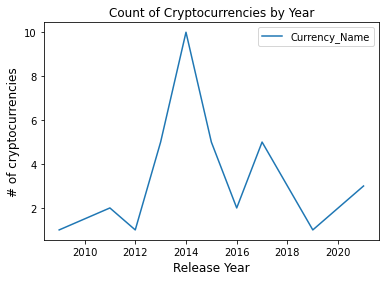

In [53]:
# Show the graphs plot results

df = pd.DataFrame(crypto_cnt_year_df, columns=['Release_Year','Currency_Name'])
df.plot(x ='Release_Year', y='Currency_Name', kind = 'line')
plt.title('Count of Cryptocurrencies by Year')

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('# of cryptocurrencies', fontsize=12)

plt.show()

# Step 9: Capture the final output to comma seperated values files

In [54]:
# store the last dataframe to csv file which can be used to make join with other dataframes

crypto_df.to_csv("Crypto_Currencies_Metadata.csv", index=False)

In [55]:
#display the final digital currency stored in a csv file. 

crypto_df.head(10)

,Currency_Name,List_of_Symbols,Founder(s),Hash_Algorithm,Implemented_Language,Consensus mechanism,Description,Release_Year,Active_Flag,Symbol
0,Bitcoin,"BTC, XBT, ₿",Satoshi Nakamoto,SHA-256d,C++,PoW,The first and most widely used decentralized l...,2009,Y,BTC
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++,PoW,One of the first cryptocurrencies to use scryp...,2011,Y,LTC
2,Namecoin,NMC,Vincent Durham,SHA-256d,C++,PoW,"Also acts as an alternative, decentralized DNS.",2011,Y,NMC
3,Peercoin,PPC,Sunny King,SHA-256d,C++,PoW & PoS,The first cryptocurrency to use both PoW and P...,2012,Y,PPC
4,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus,Scrypt,C++,PoW,Based on the Doge internet meme.,2013,Y,DOGE
5,Gridcoin,GRC,Rob Hälford,Scrypt,C++,Decentralized PoS,Linked to citizen science through the Berkeley...,2013,Y,GRC
6,Primecoin,XPM,Sunny King,1CC/2CC/TWN,"TypeScript, C++",PoW,Uses the finding of prime chains composed of C...,2013,Y,XPM
7,Ripple,XRP,Chris Larsen &Jed McCaleb,ECDSA,C++,"""Consensus""",Designed for peer to peer debt transfer. Not b...,2013,Y,XRP
8,Nxt,NXT,BCNext,SHA-256d,Java,PoS,Specifically designed as a flexible platform t...,2013,Y,NXT
9,Auroracoin,AUR,Baldur Odinsson,Scrypt,C++,PoW,Created as an alternative currency for Iceland...,2014,Y,AUR
